### Polynomial Regression

#### Polynomial Regression with NumPy

np.polyfit(x, y, 3) is used to compute the coefficients of the polynomial of degree 3 that fits the data in the least squares sense. np.poly1d(coeffs) is then used to create a one-dimensional polynomial class using these coefficients. We can evaluate this polynomial at the points in x using poly(x), and we plot this on top of the scatter plot of the original data.

Note: This code fits a polynomial of the form y = ax^3 + bx^2 + cx + d. The coefficients a, b, c, and d are determined such that the sum of the squared differences between the actual y values and the predicted y values (from the polynomial) is minimized. This is known as the method of least squares.

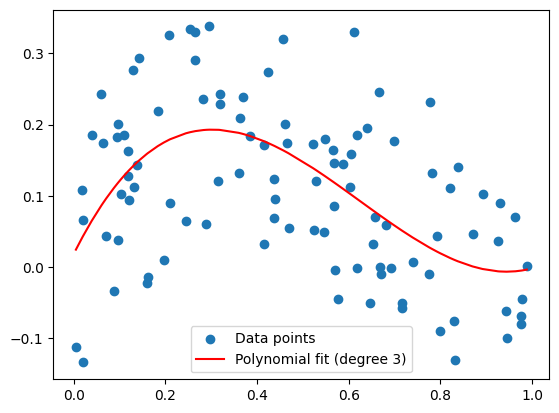

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.sort(np.random.rand(100))
y = x**3 - 2*x**2 + x + np.random.randn(100)*0.1  # cubic relationship with some noise

# Fit a polynomial of degree 3
coeffs = np.polyfit(x, y, 3)
poly = np.poly1d(coeffs)

# Plot the data and the polynomial fit
plt.scatter(x, y, label='Data points')
plt.plot(x, poly(x), color='red', label='Polynomial fit (degree 3)')
plt.legend()
plt.show()


#### Polynomial Regression with Scikit-Learn

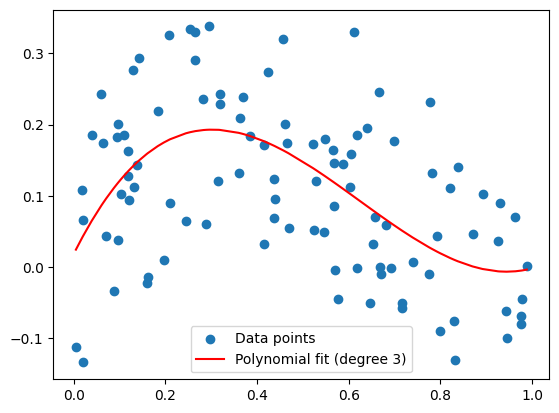

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
x = np.sort(np.random.rand(100))
y = x**3 - 2*x**2 + x + np.random.randn(100)*0.1  # cubic relationship with some noise

# Reshape x to be a 2D array of size (n_samples, n_features)
X = x[:, np.newaxis]

# Create a pipeline that first creates polynomial features and then fits a linear regression model
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)

# Predict y-values for the original x-values
yfit = model.predict(X)

# Plot the data and the polynomial fit
plt.scatter(x, y, label='Data points')
plt.plot(x, yfit, color='red', label='Polynomial fit (degree 3)')
plt.legend()
plt.show()


#### Polynomial Regression Using Scipy

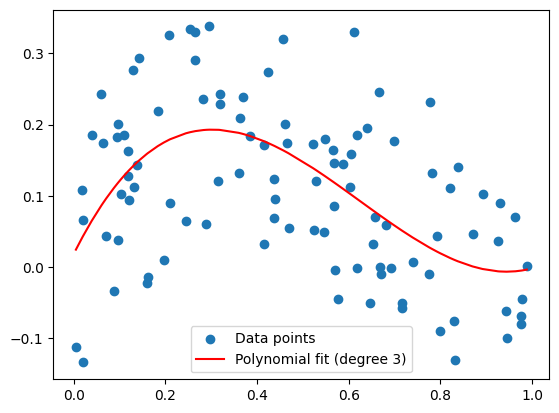

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the form of the function you want to fit
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Generate synthetic data
np.random.seed(0)
xdata = np.sort(np.random.rand(100))
ydata = xdata**3 - 2*xdata**2 + xdata + np.random.randn(100)*0.1  # cubic relationship with some noise

# Fit the function to your data
popt, pcov = curve_fit(func, xdata, ydata)

# Generate y-values for the fitted function
yfit = func(xdata, *popt)

# Plot the data and the fitted function
plt.scatter(xdata, ydata, label='Data points')
plt.plot(xdata, yfit, color='red', label='Polynomial fit (degree 3)')
plt.legend()
plt.show()


### non-linear regression using scipy 

[2.80720814 1.24568448 0.44517316]


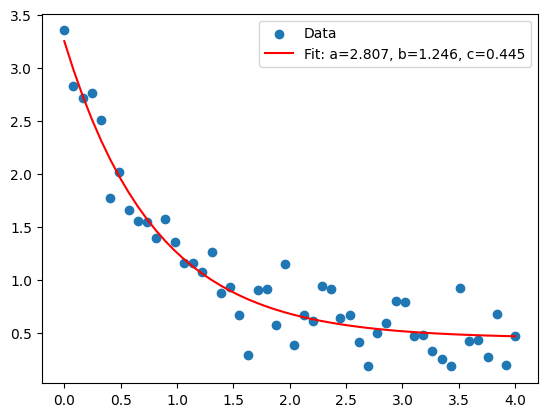

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the form of the function we want to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate some fake data to represent your real data
np.random.seed(0)
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Fit the function to the data
popt, pcov = curve_fit(func, xdata, ydata)

# Print the optimal parameters
print(popt)

# Plot the actual data
plt.scatter(xdata, ydata, label='Data')

# Plot the fit
plt.plot(xdata, func(xdata, *popt), 'r-', label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend()
plt.show()


### scikit-learn for non-linear data

a: 1.7367269445704676
b: -0.7359318444674985


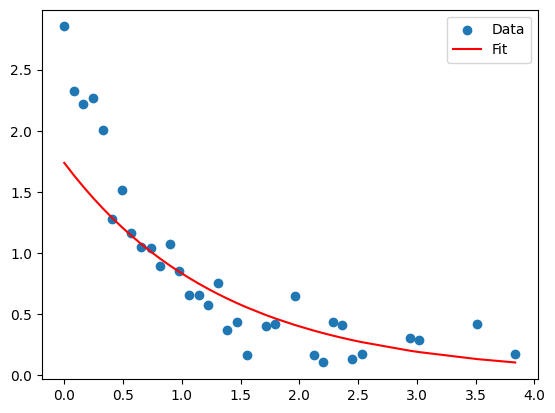

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some fake data to represent your real data
np.random.seed(0)
xdata = np.linspace(0, 4, 50)
y = 2.5 * np.exp(-1.3 * xdata) 
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Remove any data points where ydata <= 0.1 to avoid NaN issues
xdata = xdata[ydata > 0.1]
ydata = ydata[ydata > 0.1]

# Fit the Linear Regression Model to the transformed data
model = LinearRegression()
model.fit(xdata.reshape(-1, 1), np.log(ydata)) 

# Print the optimal parameters
# model.coef_ is -b and np.exp(model.intercept_) is a in our original equation
print("a:", np.exp(model.intercept_))
print("b:", model.coef_[0])

# Plot the actual data
plt.scatter(xdata, ydata, label='Data')

# Plot the fit
plt.plot(xdata, (np.exp(model.intercept_) * np.exp(model.coef_[0] * xdata)), 'r-', label='Fit')

plt.legend()
plt.show()
